In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import random
from sklearn.linear_model import LinearRegression

# 1. Linear regression with 1-dimensional input

## 1-1. Making an artificial dataset

In [2]:
x = [i for i in range(50)]

In [3]:
y = [2 * j + random.normalvariate(0,10) for j in range(50)]

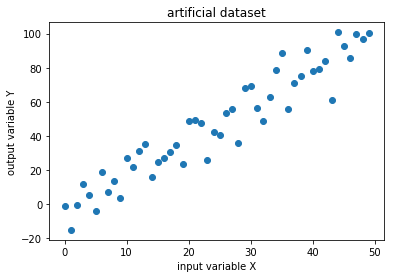

In [4]:
plt.scatter(x,y)
plt.xlabel('input variable X')
plt.ylabel('output variable Y')
plt.title('artificial dataset')
plt.show()

## 1-2. Linear regression from scratch

In [5]:
def mean(values):
    return sum(values) / len(values)

In [6]:
def beta(x, y):
    # Calculate beta_1
    covariance = 0
    variance_x = 0
    num_points = len(x)
    for i in range(num_points):
        covariance += (x[i] - mean(x)) * (y[i] - mean(y))
        variance_x += pow(x[i] - mean(x), 2)
    # covariance = covariance / num_points
    # variance_x = variance_x / num_points
    beta_1 = covariance / variance_x
    
    # Calculate beta_0
    beta_0 = mean(y) - beta_1 * mean(x)
    
    return [beta_0, beta_1]

In [7]:
beta_v1 = beta(x, y)
print(beta_v1)

[-4.321450753204466, 2.095063809277024]


## 1-3. Linear regression using numpy

In [8]:
np.cov(x, y, ddof = 0)[0,1]

436.29703828194033

In [9]:
beta_1 = np.cov(x, y, ddof = 0)[0,1] / np.var(x)
beta_0 = np.mean(y) - beta_1 * np.mean(x)
beta_v2 = [beta_0, beta_1]
print(beta_v2)

[-4.3214507532044664, 2.0950638092770242]


## 1-4. Linear regression using scikit-learn

In [10]:
train_x = np.array(x)
train_y = np.array(y)

In [11]:
# What happened?
model = LinearRegression()
model.fit(train_x, train_y)
print(model.coef_)
print(model.intercept_)

C:\Users\kth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 50]

In [12]:
train_x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [13]:
train_x.reshape(-1,1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49]])

In [14]:
model = LinearRegression()
model.fit(train_x.reshape(-1, 1), train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
LinearRegression?

In [16]:
model.intercept_

-4.3214507532044735

In [17]:
model.coef_

array([ 2.09506381])

In [18]:
model.coef_[0]

2.0950638092770246

In [19]:
beta_v3 = [model.intercept_, model.coef_[0]]
print(beta_v3)

[-4.3214507532044735, 2.0950638092770246]


In [20]:
model.coef_

array([ 2.09506381])

## 1-5. Compare results and visualize the regression line

In [21]:
print('LR_v1:\t', beta_v1)
print('LR_v2:\t', beta_v2)
print('LR_v3:\t', beta_v3)

LR_v1:	 [-4.321450753204466, 2.095063809277024]
LR_v2:	 [-4.3214507532044664, 2.0950638092770242]
LR_v3:	 [-4.3214507532044735, 2.0950638092770246]


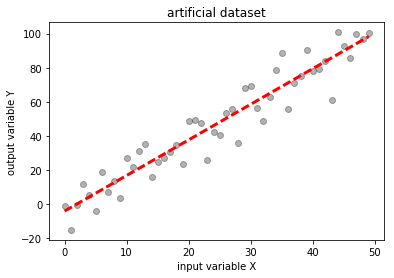

In [22]:
plt.scatter(train_x, train_y, color = 'black', alpha = 0.3)
plt.xlabel('input variable X')
plt.ylabel('output variable Y')
plt.title('artificial dataset')
plt.plot(train_x, model.predict(train_x.reshape(-1, 1)), color = 'red', linewidth=3, linestyle = '--')
plt.show()

# 2. Linear regression with 2-dimensional input

## 2-1. Loading the "advertising" dataset
- Advertising dataset from **"An Introduction to Statistical Learning"**
- http://www-bcf.usc.edu/~gareth/ISL/

In [23]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [24]:
data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [25]:
data.shape

(200, 4)

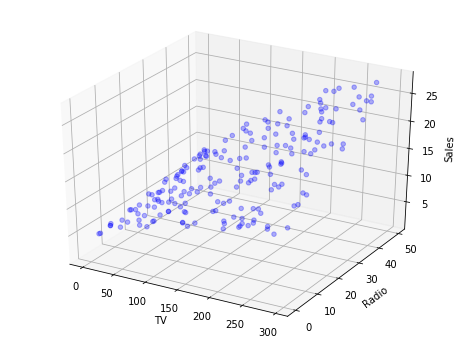

In [26]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['TV'], data['Radio'], data['Sales'], c='b', marker='o', alpha = 0.3)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

## 2-2. Linear regression using numpy

In [27]:
data[['TV', 'Radio']]

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6


In [28]:
X = data[['TV', 'Radio']]
y = data['Sales']

In [29]:
# Converting dataframe to array
X = X.values
y = y.values

In [30]:
X

array([[ 230.1,   37.8],
       [  44.5,   39.3],
       [  17.2,   45.9],
       [ 151.5,   41.3],
       [ 180.8,   10.8],
       [   8.7,   48.9],
       [  57.5,   32.8],
       [ 120.2,   19.6],
       [   8.6,    2.1],
       [ 199.8,    2.6],
       [  66.1,    5.8],
       [ 214.7,   24. ],
       [  23.8,   35.1],
       [  97.5,    7.6],
       [ 204.1,   32.9],
       [ 195.4,   47.7],
       [  67.8,   36.6],
       [ 281.4,   39.6],
       [  69.2,   20.5],
       [ 147.3,   23.9],
       [ 218.4,   27.7],
       [ 237.4,    5.1],
       [  13.2,   15.9],
       [ 228.3,   16.9],
       [  62.3,   12.6],
       [ 262.9,    3.5],
       [ 142.9,   29.3],
       [ 240.1,   16.7],
       [ 248.8,   27.1],
       [  70.6,   16. ],
       [ 292.9,   28.3],
       [ 112.9,   17.4],
       [  97.2,    1.5],
       [ 265.6,   20. ],
       [  95.7,    1.4],
       [ 290.7,    4.1],
       [ 266.9,   43.8],
       [  74.7,   49.4],
       [  43.1,   26.7],
       [ 228. ,   37.7],


In [31]:
# X의 첫 번째 열에 모든 값이 1인 array를 넣기
X = np.c_[np.ones(len(X)), X]

In [32]:
X

array([[   1. ,  230.1,   37.8],
       [   1. ,   44.5,   39.3],
       [   1. ,   17.2,   45.9],
       [   1. ,  151.5,   41.3],
       [   1. ,  180.8,   10.8],
       [   1. ,    8.7,   48.9],
       [   1. ,   57.5,   32.8],
       [   1. ,  120.2,   19.6],
       [   1. ,    8.6,    2.1],
       [   1. ,  199.8,    2.6],
       [   1. ,   66.1,    5.8],
       [   1. ,  214.7,   24. ],
       [   1. ,   23.8,   35.1],
       [   1. ,   97.5,    7.6],
       [   1. ,  204.1,   32.9],
       [   1. ,  195.4,   47.7],
       [   1. ,   67.8,   36.6],
       [   1. ,  281.4,   39.6],
       [   1. ,   69.2,   20.5],
       [   1. ,  147.3,   23.9],
       [   1. ,  218.4,   27.7],
       [   1. ,  237.4,    5.1],
       [   1. ,   13.2,   15.9],
       [   1. ,  228.3,   16.9],
       [   1. ,   62.3,   12.6],
       [   1. ,  262.9,    3.5],
       [   1. ,  142.9,   29.3],
       [   1. ,  240.1,   16.7],
       [   1. ,  248.8,   27.1],
       [   1. ,   70.6,   16. ],
       [  

In [33]:
beta_v1 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(beta_v1)

[ 2.92109991  0.04575482  0.18799423]


## 2-3. Linear regression using scikit-learn

In [34]:
X = data[['TV', 'Radio']]
y = data['Sales']

In [35]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
beta_v2 = model.coef_
beta_v2 = np.insert(beta_v2, 0, model.intercept_)
print(beta_v2)

[ 2.92109991  0.04575482  0.18799423]


## 2-4. Compare results and visualize the regression plane

In [37]:
print('LR_v1:\t', beta_v1)
print('LR_v2:\t', beta_v2)

LR_v1:	 [ 2.92109991  0.04575482  0.18799423]
LR_v2:	 [ 2.92109991  0.04575482  0.18799423]


In [38]:
X = data[['TV', 'Radio']].values
y = data['Sales'].values
y_hat = model.predict(X)

(array([  1.,   0.,   1.,   2.,   7.,  19.,  24.,  62.,  61.,  23.]),
 array([-8.79769966, -7.63464601, -6.47159236, -5.30853871, -4.14548506,
        -2.98243141, -1.81937776, -0.65632411,  0.50672953,  1.66978318,
         2.83283683]),
 <a list of 10 Patch objects>)

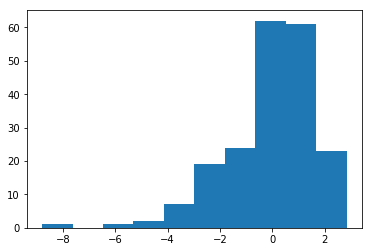

In [39]:
error = y - y_hat
plt.hist(error)

In [40]:
# error의 절대값이 3 이상인 데이터포인트 인덱스에 True 넣기
index = np.where(np.abs(error) >= 3, True, False)

In [41]:
index

array([False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

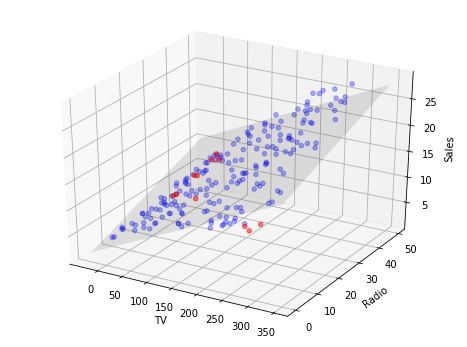

In [42]:
plt.style.use('seaborn-pastel')

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')

# Error의 절대값이 3이 넘지 않는 데이터포인트는 파란색('b'), 그렇지 않은 포인트는 빨간색('r')로 표시
ax.scatter(X[~index,0], X[~index,1], y[~index], c='b', marker='o', alpha = 0.3)
ax.scatter(X[index,0], X[index,1], y[index], c='r', marker='o', alpha = 0.5)

# Regression plane를 x1와 x2에 대한 함수로 정의
plane = lambda x1, x2: beta_v2[0] + beta_v2[1] * x1 + beta_v2[2] * x2 

# Regression plane의 영역을 (대충) 정의한 코드
grid_x1, grid_x2 = np.mgrid[-30:350, 0:50]
ax.plot_surface(grid_x1, grid_x2, plane(grid_x1, grid_x2), color = 'k', alpha = 0.1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

## 2-5. Multicollinearity
- **Multicollinearity** (also collinearity) is a phenomenon in which two or more predictor variables in a multiple regression model are highly correlated, meaning that one can be linearly predicted from the others with a substantial degree of accuracy. (from Wikipedia)
- Let's add a variable **'2 * TV'**

In [43]:
X = data[['TV', 'Radio']]
y = data['Sales']

# Converting dataframe to array
X = X.values
y = y.values

# X의 첫 번째 열에 모든 값이 1인 array를 넣기
# X의 마지막 열에 'TV' 변수값의 2배인 열을 추가
X = np.c_[np.ones(len(X)), X, 2 * X[:,0]]

In [44]:
X[0:5,]

array([[   1. ,  230.1,   37.8,  460.2],
       [   1. ,   44.5,   39.3,   89. ],
       [   1. ,   17.2,   45.9,   34.4],
       [   1. ,  151.5,   41.3,  303. ],
       [   1. ,  180.8,   10.8,  361.6]])

In [45]:
# What happened?
beta_v3 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(beta_v3)

LinAlgError: Singular matrix

In [46]:
np.corrcoef(X[:,1], X[:,3])

array([[ 1.,  1.],
       [ 1.,  1.]])

In [47]:
X = X[:,[1,2,3]]

In [48]:
X[0:5,:]

array([[ 230.1,   37.8,  460.2],
       [  44.5,   39.3,   89. ],
       [  17.2,   45.9,   34.4],
       [ 151.5,   41.3,  303. ],
       [ 180.8,   10.8,  361.6]])

In [49]:
model = LinearRegression()
model.fit(X, y)
beta_v4 = model.coef_
beta_v4 = np.insert(beta_v4, 0, model.intercept_)
print(beta_v4)
print(beta_v2)

[ 2.92109991  0.00915096  0.18799423  0.01830193]
[ 2.92109991  0.04575482  0.18799423]


In [50]:
X[0:5,]

array([[ 230.1,   37.8,  460.2],
       [  44.5,   39.3,   89. ],
       [  17.2,   45.9,   34.4],
       [ 151.5,   41.3,  303. ],
       [ 180.8,   10.8,  361.6]])